[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-03-franchise-input)

## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

* 배스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
* 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요. 
* 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 필요한 라이브러리 불러오기

In [29]:
# pandas, numpy, seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [30]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [31]:
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

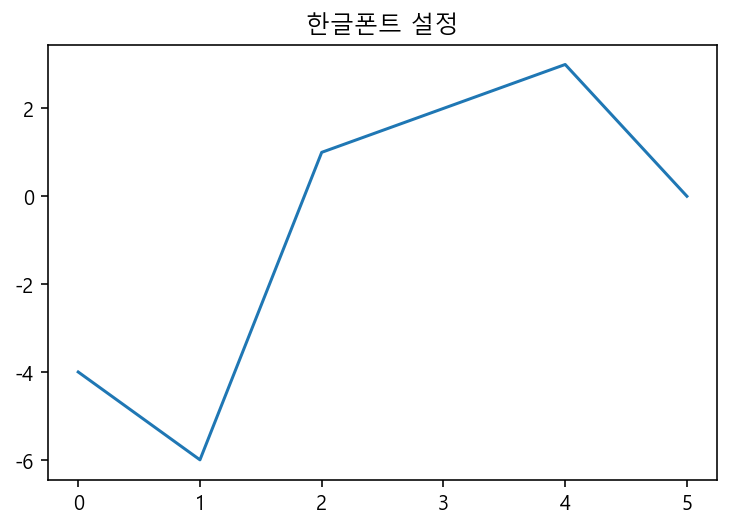

In [32]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글폰트 설정")
plt.plot([-4, -6, 1, 2, 3, 0])

## Google Colab 을 위한 코드
### Colab 에서 실행을 위한 코드

* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.

In [33]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

### Colab 용 GoogleAuth 인증 
* 구글 드라이브에 있는 파일을 가져오기 위해 사용합니다.

In [34]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [35]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1e91PH_KRFxNXUsx8Hi-Q2vPiorCDsOP4'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/상가업소정보_201912_01.csv')  

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [36]:
# 파일을 불러와 df 라는 변수에 담습니다.

df = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_부산_202106.csv", sep=',')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813,47327.0,NaN,NaN,NaN,129.024938,35.151645
1,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
2,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267
3,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751,48305.0,NaN,NaN,NaN,129.115397,35.143770
4,17175332,정성밥상,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2635010500105520002023290,NaN,부산광역시 해운대구 해운대로 635-7,612819,48087.0,NaN,NaN,NaN,129.159641,35.164474


### 데이터 크기 보기

In [37]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df.shape

(136517, 39)

### info 보기

In [38]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136517 entries, 0 to 136516
Data columns (total 39 columns):
상가업소번호       136517 non-null int64
상호명          136516 non-null object
지점명          18836 non-null object
상권업종대분류코드    136517 non-null object
상권업종대분류명     136517 non-null object
상권업종중분류코드    136517 non-null object
상권업종중분류명     136517 non-null object
상권업종소분류코드    136517 non-null object
상권업종소분류명     136517 non-null object
표준산업분류코드     123662 non-null object
표준산업분류명      123662 non-null object
시도코드         136517 non-null int64
시도명          136517 non-null object
시군구코드        136517 non-null int64
시군구명         136517 non-null object
행정동코드        136517 non-null int64
행정동명         136284 non-null object
법정동코드        136517 non-null int64
법정동명         136517 non-null object
지번코드         136517 non-null int64
대지구분코드       136517 non-null int64
대지구분명        136517 non-null object
지번본번지        136517 non-null int64
지번부번지        116948 non-null float64
지번주소         136517 non-null obje

### 결측치 보기

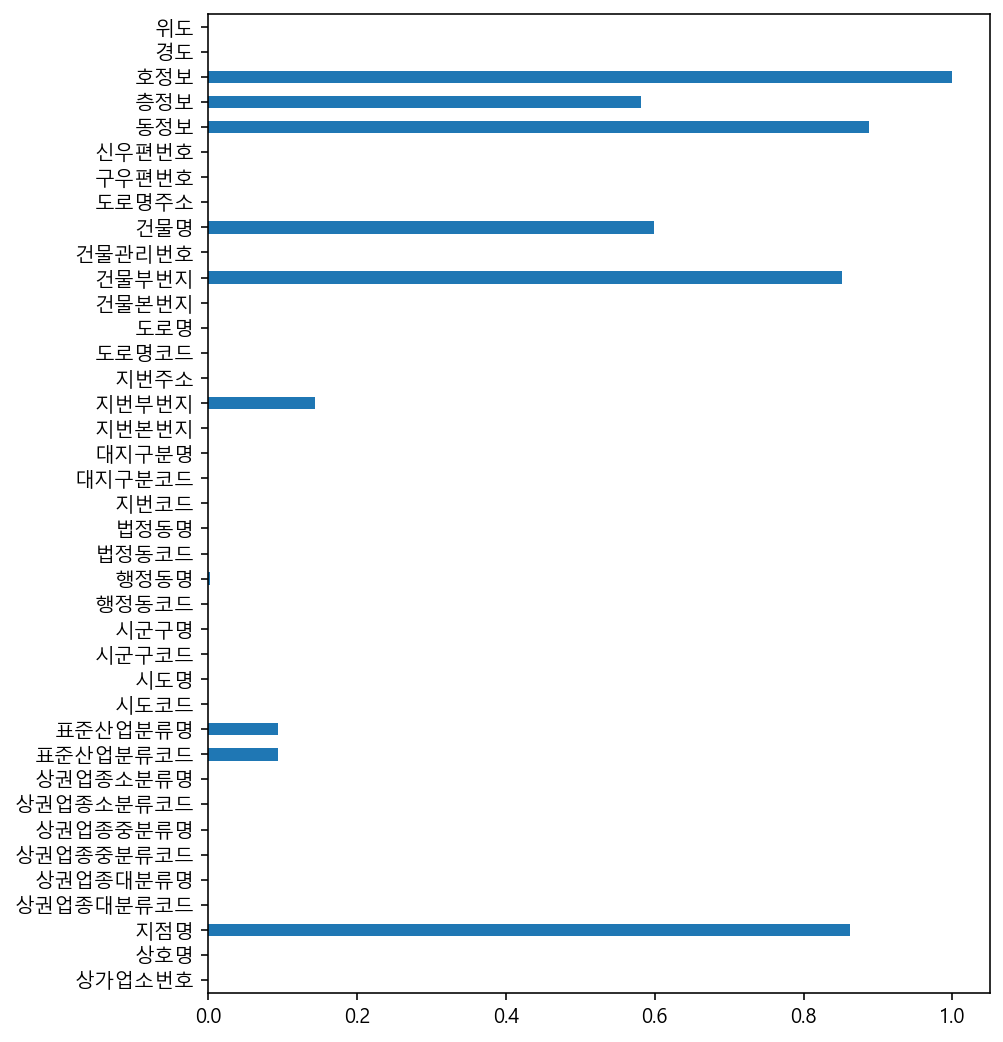

In [39]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.
df.isnull().mean().plot.barh(figsize=(7,9))

### 사용하지 않는 컬럼 제거하기

In [40]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
        '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
        '경도', '위도']

print(df.shape)
df = df[columns].copy()
df.shape

(136517, 39)


(136517, 11)

In [41]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136517 entries, 0 to 136516
Data columns (total 11 columns):
상호명         136516 non-null object
상권업종대분류명    136517 non-null object
상권업종중분류명    136517 non-null object
상권업종소분류명    136517 non-null object
시도명         136517 non-null object
시군구명        136517 non-null object
행정동명        136284 non-null object
법정동명        136517 non-null object
도로명주소       136517 non-null object
경도          136517 non-null float64
위도          136517 non-null float64
dtypes: float64(2), object(9)
memory usage: 11.5+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [42]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.

df_seoul = df[df["시도명"]=="부산광역시"].copy()
print(df_seoul.shape)
df_seoul.head()

(136517, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,도란도란,음식,한식,한식/백반/한정식,부산광역시,부산진구,개금1동,개금동,부산광역시 부산진구 가야대로482번길 29-3,129.024938,35.151645
1,미광장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,부산광역시,중구,부평동,부평동4가,부산광역시 중구 보수대로44번길 5,129.023668,35.100979
2,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,부산광역시,동래구,복산동,복천동,부산광역시 동래구 동래로147번길 18,129.087156,35.205267
3,스텔라,소매,의복의류,일반의류,부산광역시,수영구,남천2동,남천동,부산광역시 수영구 광안해변로 100,129.115397,35.143770
4,정성밥상,음식,한식,한식/백반/한정식,부산광역시,해운대구,우1동,우동,부산광역시 해운대구 해운대로 635-7,129.159641,35.164474


In [43]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.

df_seoul["시군구명"].unique()

array(['부산진구', '중구', '동래구', '수영구', '해운대구', '사상구', '강서구', '사하구', '북구',
       '남구', '영도구', '서구', '동구', '연제구', '기장군', '금정구'], dtype=object)

In [44]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.
df_seoul["시군구명"].nunique()

16

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [45]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.
df_seoul.to_csv("busan_open_store.csv", index=False)

In [46]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.
pd.read_csv("busan_open_store.csv").head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,도란도란,음식,한식,한식/백반/한정식,부산광역시,부산진구,개금1동,개금동,부산광역시 부산진구 가야대로482번길 29-3,129.024938,35.151645
1,미광장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,부산광역시,중구,부평동,부평동4가,부산광역시 중구 보수대로44번길 5,129.023668,35.100979
2,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,부산광역시,동래구,복산동,복천동,부산광역시 동래구 동래로147번길 18,129.087156,35.205267
3,스텔라,소매,의복의류,일반의류,부산광역시,수영구,남천2동,남천동,부산광역시 수영구 광안해변로 100,129.115397,35.143770
4,정성밥상,음식,한식,한식/백반/한정식,부산광역시,해운대구,우1동,우동,부산광역시 해운대구 해운대로 635-7,129.159641,35.164474


## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [60]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.

df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [61]:
df_seoul[df_seoul["상호명_소문자"].isnull()]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자


In [58]:
# df_seoul.loc[44355, "상호명"] = "이름없음"

In [62]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), "상호명_소문자"].shape

(132,)

In [63]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"), "상호명_소문자"].shape

(40,)

In [64]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.
df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(172, 12)

In [65]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), "브랜드명"] = "배스킨라빈스"
df_31[["상호명", "브랜드명"]].head()

,상호명,브랜드명
771,비알코리아던킨도너츠김해공항국제선1호,NaN
773,비알코리아던킨도너츠김해공항공항국제선2호,NaN
833,배스킨라빈스31남산점,배스킨라빈스
2552,배스킨라빈스31사상이마트점,배스킨라빈스
3241,던킨도너츠센텀시티홈플러스점,NaN


In [66]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
#           "브랜드명"]

df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31["브랜드명"]

771        던킨도너츠
773        던킨도너츠
833       배스킨라빈스
2552      배스킨라빈스
3241       던킨도너츠
           ...  
133893     던킨도너츠
135695     던킨도너츠
135805    배스킨라빈스
136342    배스킨라빈스
136466    배스킨라빈스
Name: 브랜드명, Length: 172, dtype: object

In [67]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.

df_31["상권업종대분류명"].value_counts()

음식    172
Name: 상권업종대분류명, dtype: int64

In [70]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.

df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명


In [71]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])].copy()
df_31.shape

(172, 13)

### 범주형 값으로 countplot 그리기

In [72]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.
brand_count = df_31["브랜드명"].value_counts()
brand_count

배스킨라빈스    132
던킨도너츠      40
Name: 브랜드명, dtype: int64

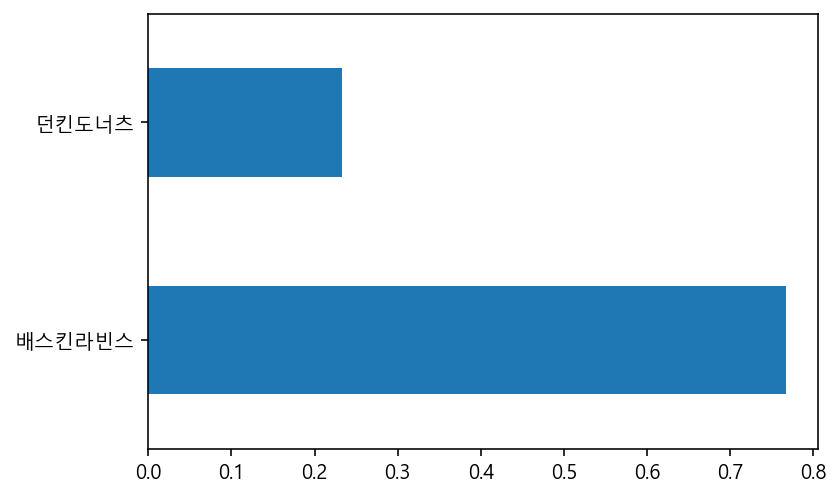

In [73]:
# normalize=True 로 빈도수의 비율을 구합니다.
df_31["브랜드명"].value_counts(normalize=True).plot.barh()

In [74]:
brand_count.index

Index(['배스킨라빈스', '던킨도너츠'], dtype='object')

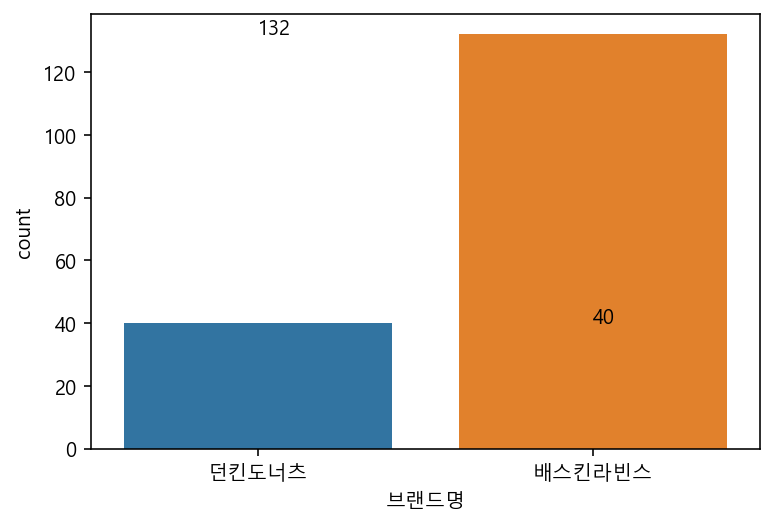

In [75]:
# countplot 을 그립니다.

g = sns.countplot(data=df_31, x="브랜드명")

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])


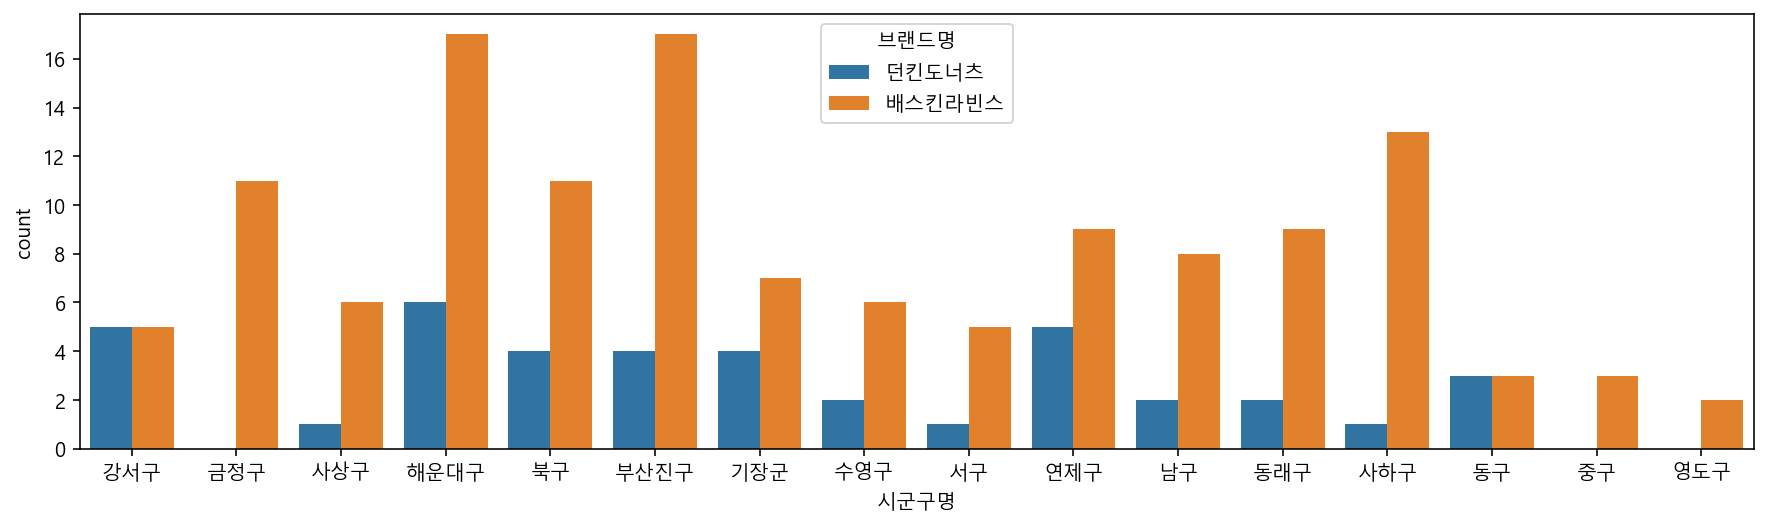

In [76]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.

plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

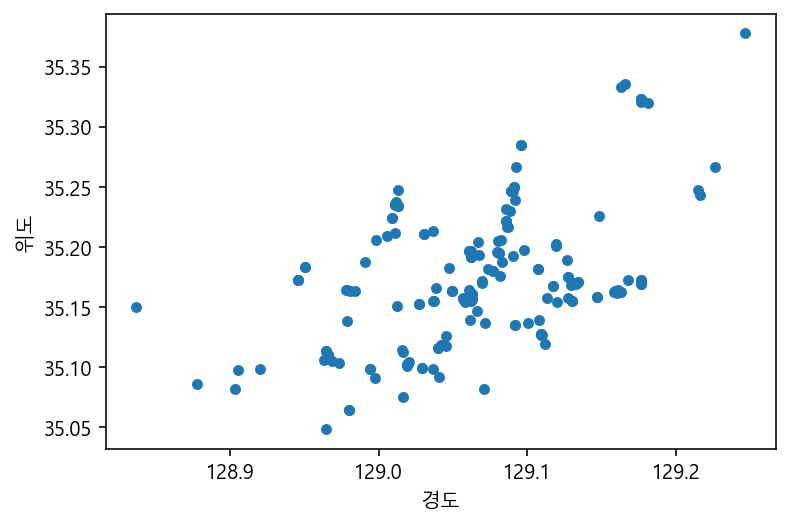

In [77]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.
df_31[["위도", "경도"]].plot.scatter(x="경도", y="위도")

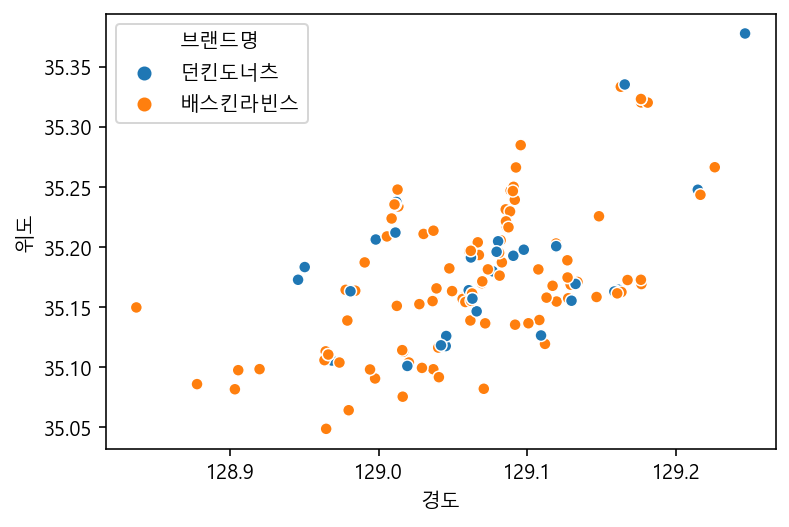

In [78]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.

sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

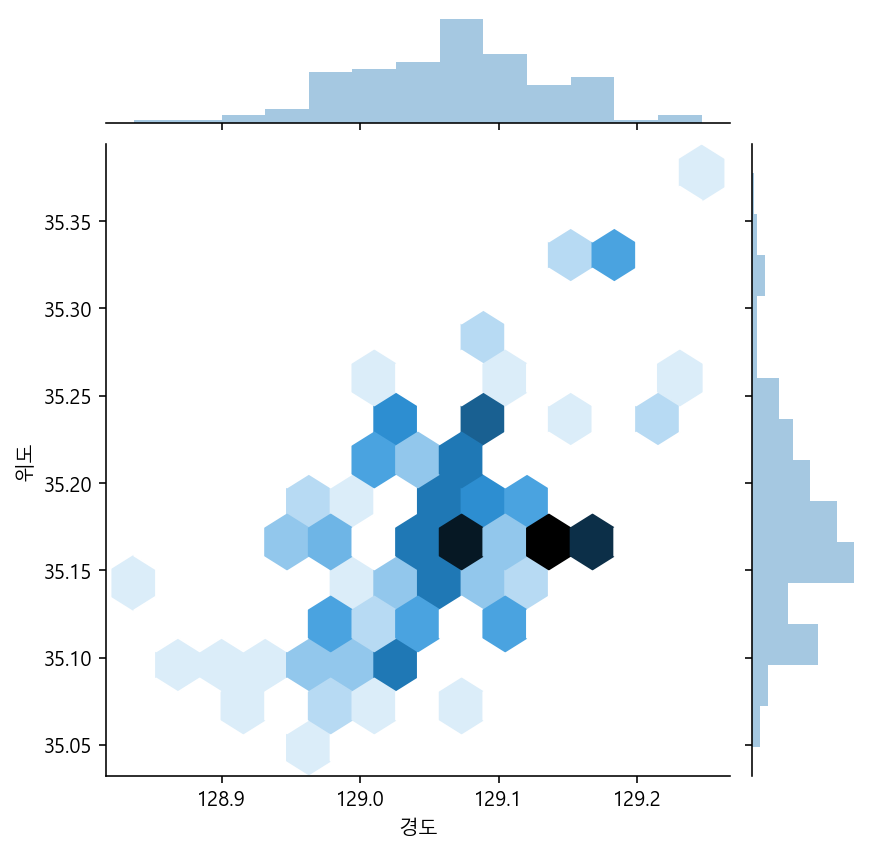

In [79]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.

sns.jointplot(data=df_31, x="경도", y="위도", kind="hex")

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [80]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리

import folium

In [81]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df_31["위도"].mean()
long = df_31["경도"].mean()

In [87]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

m = folium.Map([lat, long])
folium.Marker(
    [35.163325, 129.049343],
    popup='<i>베스킨라빈스</i>',
    tooltip="베스킨라빈스").add_to(m)
m

In [86]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.

df_31.sample(random_state=31)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
21015,배스킨라빈스31,음식,패스트푸드,아이스크림판매,부산광역시,부산진구,부암1동,부암동,부산광역시 부산진구 신천대로 241,129.049343,35.163325,배스킨라빈스31,배스킨라빈스


In [88]:
# html 파일로 저장하기
# tooltip 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.
# m.save(index.html)

### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [89]:
# 데이터프레임의 인덱스만 출력합니다.

df_31.index

Int64Index([   771,    773,    833,   2552,   3241,   3546,   4342,   4564,
              4820,   5303,
            ...
            126005, 128569, 128839, 129496, 131839, 133893, 135695, 135805,
            136342, 136466],
           dtype='int64', length=172)

### 기본 마커로 표현하기

In [90]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(m)
    
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [91]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(marker_cluster)
    
m

## 파리바게뜨와 뚜레주르 분석하기

### 데이터 색인으로 가져오기

In [92]:
df_seoul["상호명"].str.extract("뚜레(주|쥬)르")[0].value_counts()

쥬    61
Name: 0, dtype: int64

In [93]:
# str.contains 를 사용해서 뚜레(주|쥬)르|파리(바게|크라상) 으로 상호명을 찾습니다.
# df_bread 라는 데이터프레임에 담습니다.
df_bread = df_seoul[df_seoul["상호명"].str.contains("뚜레(주|쥬)르|파리(바게|크라상)")].copy()
df_bread.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(159, 12)

### 가져온 데이터가 맞는지 확인하기

In [94]:
# 잘못 가져온 데이터가 있는지 확인합니다.

df_bread["상권업종대분류명"].value_counts()

음식    159
Name: 상권업종대분류명, dtype: int64

In [95]:
# 제과점과 상관 없을 것 같은 상점을 추출합니다.

df_bread[df_bread["상권업종대분류명"] == "학문/교육"]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자


In [96]:
# "상권업종대분류명"이 "학문/교육"이 아닌 것만 가져옵니다.
print(df_bread.shape)
df_bread = df_bread[df_bread["상권업종대분류명"] != "학문/교육"].copy()
print(df_bread.shape)

(159, 12)
(159, 12)


In [97]:
# 상호명의 unique 값을 봅니다.
df_bread["상호명"].unique()

array(['13264파리바게트부산초량', '파리바게뜨가야반도보라', '뚜레쥬르', '파리바게뜨주례동일점',
       '신개금LGA파리바게뜨', '파리바게뜨', '뚜레쥬르서부터미널점', '파리바게뜨중앙동', '파리바게뜨사직',
       '파리바게뜨명지국제신도시점', '파리바게뜨서면엔씨백화점', '파리바게뜨서면NC백화점', '뚜레쥬르부산시청점',
       '뚜레쥬르부산기장동부', '뚜레쥬르부산교대역점', '뚜레쥬르부산부경대점', '뚜레쥬르부산구서롯데캐슬',
       '뚜레쥬르부산백병원점', '파리바게뜨센텀재송점', '파리바게뜨연산연동점', '파리바게뜨부산정보대점',
       '파리바게뜨부산다대삼환점', '뚜레쥬르부산학장본점부산학장본점', '파리바게뜨기장대청점', '파리바게뜨용호점',
       '파리바게트전포', '뚜레쥬르부산연산파크시티점', '뚜레쥬르율리역점', '파리크라상부산덕천점',
       '파리바게트16979영도대교', '뚜레쥬르부산냉정역', '뚜레쥬르화명카이저주상가점', '파리바게뜨부산충무점',
       '사상엄궁뚜레쥬르', '뚜레쥬르영도동삼', '덕포신익파리바게트', '씨제이뚜레쥬르', '뚜레쥬르서부산유통단지점',
       '파리바게뜨부암화승점', '파리바게뜨쌍용예가', '파리바게트부산괴정점', '뚜레쥬르부산대푸르지오점',
       '파리바게뜨좌동롯데', '뚜레쥬르온종합병원점', '파리크라상'], dtype=object)

In [98]:
# 상호명이 '파스쿠찌|잠바주스'가 아닌 것만 가져오세요.

print(df_bread.shape)
df_bread = df_bread[~df_bread["상호명"].str.contains('파스쿠찌|잠바주스')].copy()
print(df_bread.shape)

(159, 12)
(159, 12)


In [99]:
# 브랜드명 컬럼을 만듭니다. "파리바게뜨" 에 해당되는 데이터에 대한 값을 채워줍니다.
# 파리크라상에 대한 처리를 따로 해주세요!
df_bread.loc[df_bread["상호명"].str.contains("파리바게"), "브랜드명"] = "파리바게뜨"
df_bread.loc[df_bread["상호명"].str.contains("파리크라상"), "브랜드명"] = "파리바게뜨"
df_bread.loc[df_bread["상호명"].str.contains("뚜레"), "브랜드명"] = "뚜레쥬르"
df_bread[["상호명", "브랜드명"]].head()

,상호명,브랜드명
336,13264파리바게트부산초량,파리바게뜨
391,파리바게뜨가야반도보라,파리바게뜨
678,뚜레쥬르,뚜레쥬르
813,파리바게뜨주례동일점,파리바게뜨
2417,신개금LGA파리바게뜨,파리바게뜨


In [100]:
# 브랜드명 컬럼의 결측치는 "뚜레쥬르" 이기 때문에 fillna 를 사용해서 값을 채웁니다.

df_bread["브랜드명"].fillna("뚜레주르")
df_bread[["상호명", "브랜드명"]].head()

,상호명,브랜드명
336,13264파리바게트부산초량,파리바게뜨
391,파리바게뜨가야반도보라,파리바게뜨
678,뚜레쥬르,뚜레쥬르
813,파리바게뜨주례동일점,파리바게뜨
2417,신개금LGA파리바게뜨,파리바게뜨


### 범주형 변수 빈도수 계산하기

In [101]:
# 브랜드명의 빈도수를 봅니다.

df_bread["브랜드명"].value_counts()

파리바게뜨    98
뚜레쥬르     61
Name: 브랜드명, dtype: int64

In [102]:
df_bread["브랜드명"].value_counts(normalize=True)

파리바게뜨    0.616352
뚜레쥬르     0.383648
Name: 브랜드명, dtype: float64

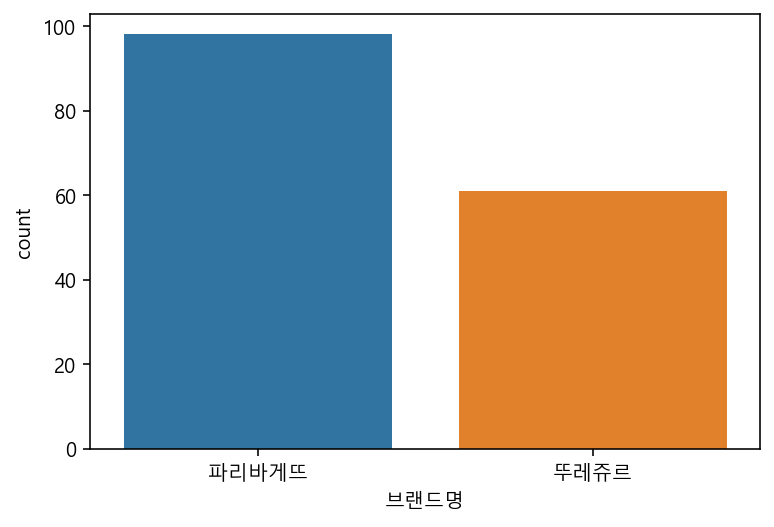

In [103]:
# countplot 으로 브랜드명을 그려봅니다.

sns.countplot(data=df_bread, x="브랜드명")

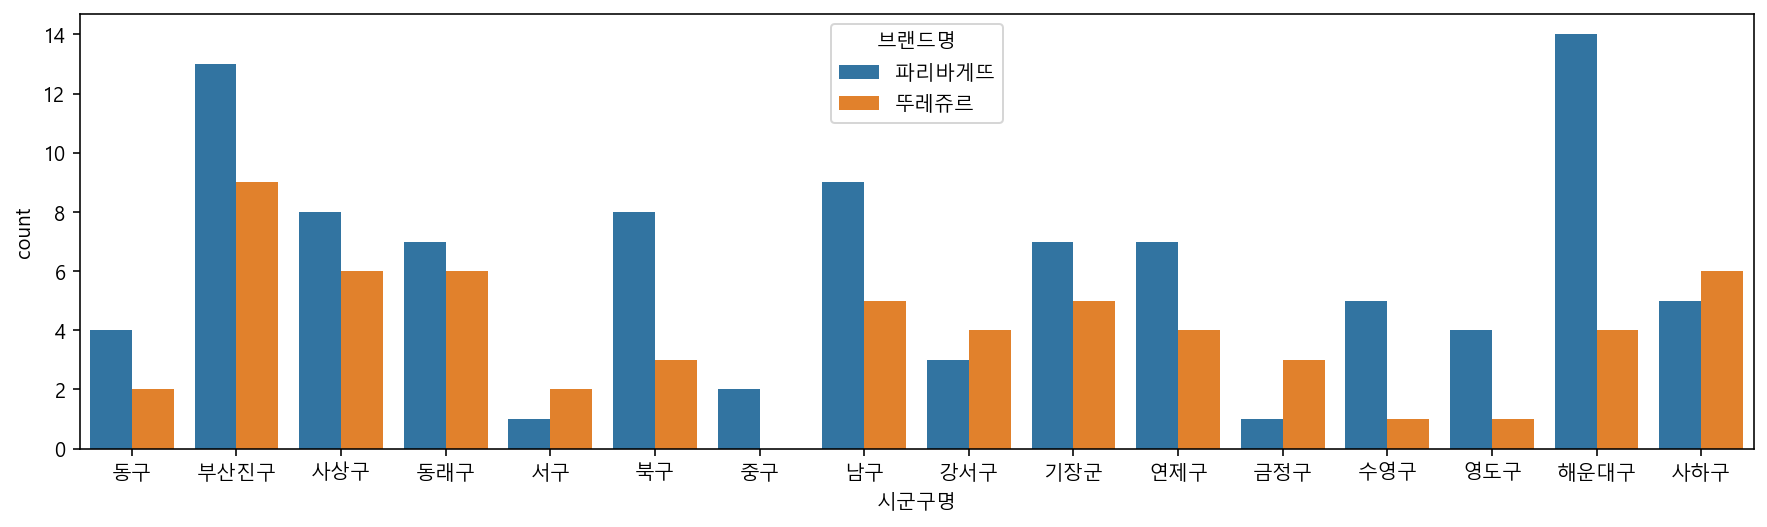

In [104]:
# 시군구별로 브랜드명의 빈도수 차이를 비교합니다.

plt.figure(figsize=(15,4))
sns.countplot(data=df_bread, x="시군구명", hue="브랜드명")

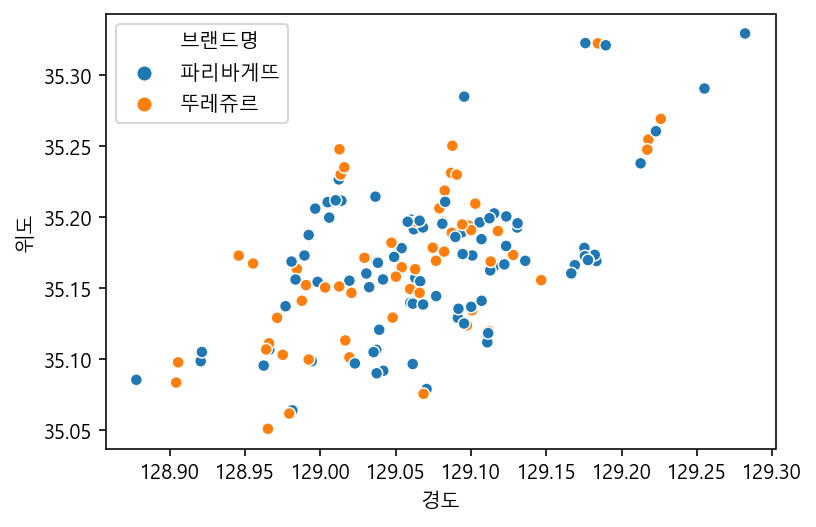

In [105]:
# scatterplot 으로 위경도를 표현해 봅니다.
sns.scatterplot(data=df_bread, x="경도", y="위도", hue="브랜드명")

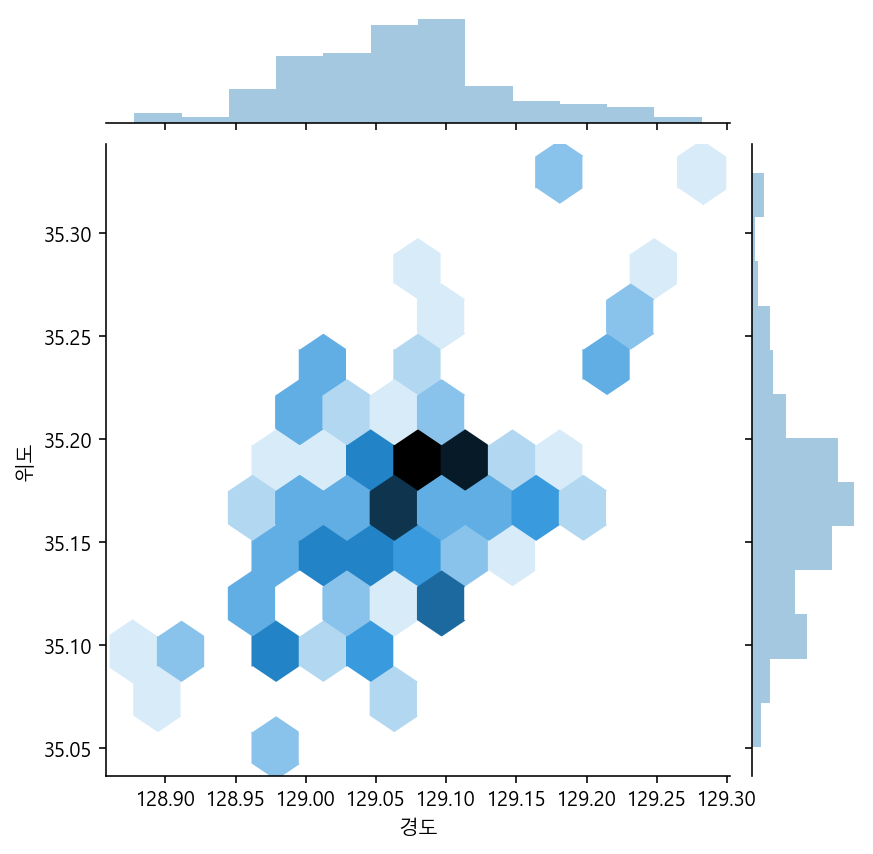

In [106]:
# jointplot 으로 위경도를 표현해 봅니다.
sns.jointplot(data=df_bread, x="경도", y="위도", kind="hex")

## 지도에 표현하기
### Marker 로 위치를 찍어보기

In [107]:
df_bread.index

Int64Index([   336,    391,    678,    813,   2417,   4523,   4618,   4715,
              6556,   7886,
            ...
            129928, 130204, 131041, 133154, 133672, 133726, 133774, 133775,
            134808, 135860],
           dtype='int64', length=159)

In [109]:
df_bread.loc[129928, "위도"]

35.1352968187637

In [354]:
# for i in df_bread.index:
#     print(i)

2935
13843
14031
14229
14246
14713
14842
14889
14897
15019
15075
15210
15295
15308
15313
15932
21076
21098
29050
29756
32976
34846
37488
40363
44665
52769
55142
67512
72200
87075
88167
89741
110250
113801
127482
129359
129476
135663
138210
140703
142629
147219
149653
149962
159501
162889
164411
164856
166524
166853
166854
167366
167711
168353
169336
171022
171755
173389
174333
175508
175761
182862
186608
187749
187981
189464
190647
191338
191900
192027
192163
192752
195070
196818
200552
201124
201162
201254
202723
202830
203299
204549
204649
204690
205108
206922
207957
207997
208552
209289
209292
209311
210514
213906
214127
214162
214251
214388
216658
217070
217580
218007
220102
221211
221751
221797
222152
222321
222328
222405
226807
227436
227505
227540
227900
228823
230578
230665
230669
231267
231593
231802
235081
237546
237864
237998
238152
239434
239463
240390
241097
241507
242005
243714
243715
244224
244238
244297
244746
244793
245329
245460
246453
246748
247705
247966
248634
2508

In [110]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")

for i in df_bread.index:
    sub_lat = df_bread.loc[i, '위도']
    sub_long = df_bread.loc[i, '경도']
    
    title = df_bread.loc[i, '상호명'] + " - " + df_bread.loc[i, '도로명주소']
    
    icon_color = "blue"
    if df_bread.loc[i, '브랜드명'] == "뚜레쥬르":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat, sub_long],
        radius = 3,
        color=icon_color,
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(m)
m.save("paris-tour.html")
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [111]:
m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")
marker_cluster = MarkerCluster().add_to(m)

for i in df_bread.index:
    sub_lat = df_bread.loc[i, '위도']
    sub_long = df_bread.loc[i, '경도']
    
    title = df_bread.loc[i, '상호명'] + " - " + df_bread.loc[i, '도로명주소']
    
    icon_color = "blue"
    if df_bread.loc[i, '브랜드명'] == "뚜레쥬르":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat, sub_long],
        radius = 3,
        color=icon_color,
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(marker_cluster)
m.save("paris-tour2.html")
m

### Heatmap 으로 그리기
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Heatmap.ipynb

In [112]:
# heatmap 예제 이해하기
data = (
    np.random.normal(size=(100, 3)) * np.array([[1, 1, 1]]) + np.array([[48, 5, 1]])
).tolist()
data[:5]

[[48.60940195599713, 5.254556598796473, -0.7524291576504185],
 [48.34649391406718, 6.784965935710476, 0.9891067219565791],
 [47.65397792544566, 3.7784721585439422, 1.9286802935288634],
 [48.582880953007866, 3.450108475625192, -0.6315632285397956],
 [47.819816071415495, 4.367063389528308, 0.16154783516049864]]

In [113]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기
heat = df_bread[["위도", "경도", "브랜드명"]].copy()
heat["브랜드명"] = heat["브랜드명"].str.strip()
heat["브랜드명"] = heat["브랜드명"].replace("뚜레쥬르", 1).replace("파리바게뜨", 1)
heat = heat.values
heat

array([[ 35.12052554, 129.03907394,   1.        ],
       [ 35.1504999 , 129.03240898,   1.        ],
       [ 35.16906109, 129.07676149,   1.        ],
       [ 35.15422141, 128.99813592,   1.        ],
       [ 35.15486784, 129.01901921,   1.        ],
       [ 35.19392608, 129.09831509,   1.        ],
       [ 35.21849548, 129.08255448,   1.        ],
       [ 35.10107033, 129.01924868,   1.        ],
       [ 35.21026071, 129.00689378,   1.        ],
       [ 35.16338388, 128.98439531,   1.        ],
       [ 35.14916567, 129.05957642,   1.        ],
       [ 35.21140068, 129.01394802,   1.        ],
       [ 35.10636327, 129.03711719,   1.        ],
       [ 35.1980608 , 129.06017807,   1.        ],
       [ 35.12363587, 129.09731581,   1.        ],
       [ 35.09835376, 128.92050328,   1.        ],
       [ 35.15704958, 129.06303721,   1.        ],
       [ 35.10486484, 128.92131139,   1.        ],
       [ 35.21035916, 129.00480823,   1.        ],
       [ 35.11298283, 129.01651

In [114]:
heat[:5]

array([[ 35.12052554, 129.03907394,   1.        ],
       [ 35.1504999 , 129.03240898,   1.        ],
       [ 35.16906109, 129.07676149,   1.        ],
       [ 35.15422141, 128.99813592,   1.        ],
       [ 35.15486784, 129.01901921,   1.        ]])

In [115]:
# HeatMap 그리기

from folium.plugins import HeatMap


m = folium.Map([lat, long], tiles="stamentoner", zoom_start=12)

HeatMap(heat).add_to(m)

m.save("Heatmap.html")

m